In [12]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_probabilities = pd.read_csv('data/nearest_neighbor_probabilities.csv')

In [5]:
df_probabilities

,tumor,n_clusters,nearest_neighbor_probability,p
0,3430_NT_T2,8,0.460771,0.0
1,3430_NT_T2,7,0.460771,0.0
2,3430_NT_T2,6,0.474799,0.0
3,3430_NT_T2,5,0.474799,0.0
4,3430_NT_T2,4,0.474799,0.0
...,...,...,...,...
111,3730_NT_T2,6,0.587554,0.0
112,3730_NT_T2,5,0.717493,0.0
113,3730_NT_T2,4,0.753207,0.0
114,3730_NT_T2,3,0.800188,0.0


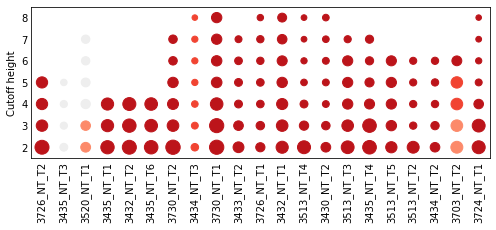

In [13]:
# x as tumors, y as partition count
# color = significance, size = nearest neighbor probability
tumors = [
    '3726-T2',
    '3435-T3',
    '3520-T1',
    '3435-T1',
    '3432-T2',
    '3435-T6',
    '3730-T2',
    '3434-T3',
    '3730-T1',
    '3433-T2',
    '3726-T1',
    '3432-T1',
    '3513-T4',
    '3430-T2',
    '3513-T3',
    '3435-T4',
    '3513-T5',
    '3513-T2',
    '3434-T2',
    '3703-T2',
    '3724-T1',
]
tumors = ['{}_NT_{}'.format(*tumor.split('-')) for tumor in tumors]
clusters = np.arange(df['n_clusters'].min(), df['n_clusters'].max()+1)
values = []
ps = []
for tumor in tumors:
    df_tumor = df[df['tumor'] == tumor].sort_values('n_clusters')
    values.append(list(df_tumor['nearest_neighbor_probability']) + [0] * (len(clusters) - df_tumor.shape[0]))
    ps.append(list(df_tumor['p']) + [1] * (len(clusters) - df_tumor.shape[0]))
    
fig, ax = plt.subplots(figsize=(7, 3.3), tight_layout=True)
circles = []
for i, tumor_values in enumerate(values):
    for j, value in enumerate(tumor_values):
        circles.append(plt.Circle((i, j), radius=value / 3))
colors = []
for p in np.array(ps).flatten():
    if p < 0.001:
        colors.append(mpl.cm.Reds(0.8))
    elif p < 0.01:
        colors.append(mpl.cm.Reds(0.6))
    elif p < 0.05:
        colors.append(mpl.cm.Reds(0.4))
    else:
        colors.append(mpl.colors.to_rgba('#EEEEEE'))
        
col = PatchCollection(circles, color=colors)
ax.add_collection(col)
_ = ax.set(xticks=np.arange(len(tumors)), yticks=np.arange(len(clusters)), yticklabels=clusters)
ax.set_xlim(ax.get_xlim()[0] - 0.5, ax.get_xlim()[1] + 0.5)
ax.set_ylim(ax.get_ylim()[0] - 0.5, ax.get_ylim()[1] + 0.5)
_ = ax.set_xticklabels(tumors, rotation=90)
_ = ax.set_ylabel('Cutoff height')
_ = ax.tick_params(axis='both', which='both', length=0)